# Linear Regression

## The Normal Equation

In [55]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

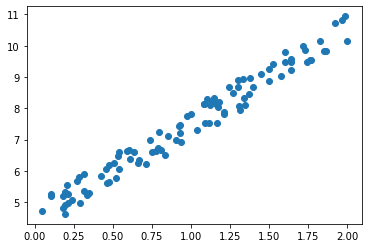

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [57]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.53187951],
       [3.01322885]])

In [58]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53187951],
       [10.55833722]])

In [59]:
print(X_new)
print(X_new_b)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


Text(0, 0.5, 'y')

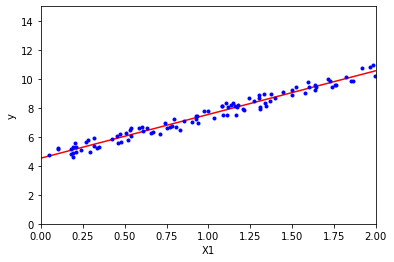

In [60]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.xlabel('X1')
plt.ylabel('y')

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_ , lin_reg.coef_

(array([4.53187951]), array([[3.01322885]]))

In [62]:
lin_reg.predict(X_new)

array([[ 4.53187951],
       [10.55833722]])

In [63]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.53187951],
       [3.01322885]])

In [64]:
np.linalg.pinv(X_b).dot(y)

array([[4.53187951],
       [3.01322885]])

# Gradient Descent

## Batch Gradient Descent

In [65]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.53187951],
       [3.01322885]])

## Stochastic Gradient Descent

In [66]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.52903165],
       [3.0154991 ]])

In [67]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [68]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52985341]), array([3.04937281]))

# Polynomial Regression

In [69]:
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2+ X + 2 + np.random.randn(m,1)

(-3.0, 3.0, 0.0, 10.0)

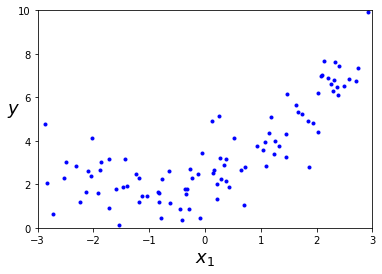

In [70]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)
X[0]

array([-0.62679306])

In [72]:
X_poly[0]

array([-0.62679306,  0.39286953])

In [73]:
X_poly.shape, y.shape

((100, 2), (100, 1))

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09483022]), array([[0.97931192, 0.4514441 ]]))

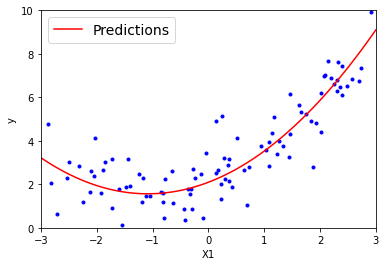

In [75]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.xlabel('X1')
plt.ylabel('y')

#prediction
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_pred, 'r-' , label='Predictions')
plt.legend(loc="upper left", fontsize=14)

# Learning Curves

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y , test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

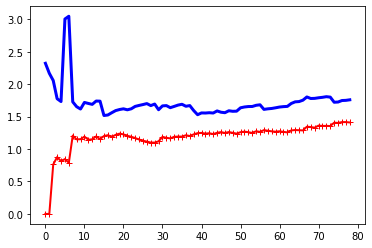

In [77]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

(0.0, 80.0, 0.0, 3.0)

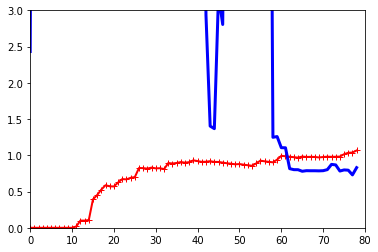

In [78]:
from sklearn.pipeline import Pipeline 

poly_reg = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ('lin_reg',LinearRegression())])

plot_learning_curves(poly_reg, X, y)
plt.axis([0, 80, 0, 3])

# Regularized Linear Model

## Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.85231977]])

Using Stochastic Gradient Descent

In [80]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.81323247])

## Lasso Regression

In [81]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.80496227])

Using Stochastic Gradient Descent

In [82]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82164931])

## Elastic Net

In [83]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.80383763])

## Early Stopping

In [84]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y , test_size=0.2)
oly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler())
 ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
 penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

IndentationError: expected an indented block (Temp/ipykernel_8932/2802058507.py, line 21)

# Logistic Regression

## Estimating Probabilities

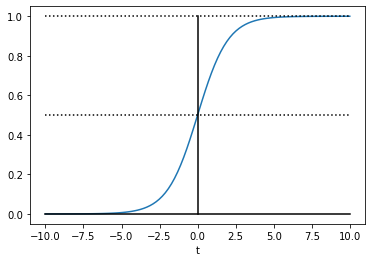

In [85]:
t = np.linspace(-10, 10, 100)
sigmoid = 1/(1+np.exp(-t))
plt.plot(t, sigmoid)
plt.xlabel('t')
plt.plot([-10, 10], [0,0], 'k-')
plt.plot([0, 0], [0, 1], 'k-')
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")

## Decision Boundaries

In [86]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [87]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [88]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

C:\Users\noura\AppData\Local\Temp/ipykernel_8932/3902192443.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


In [89]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

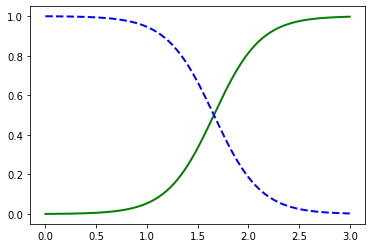

In [90]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [91]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# Softmax  Regression

In [92]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [93]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [94]:
softmax_reg.predict([[5,2]])

array([2])

In [95]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises

#### 1.
It's better to use Stochastic GD or Mini-batch GD. Batch GD requires high hardware capabilities. Normal Equation and th SVD get very slow when the number of features grows large.

#### 2.
In GD, the cost function can have a shape of elongated bowl if the features have very different scales. Using regularization, GD can reach a near optimum. Normal Equation and SVD can do it well.

#### 3.
Logistic Regression's cost function is covex, so GD will find the global minimum.

#### 4.
If the problem is convex, all GD algorithms will converge. But, Stochastic and Mini-batch GD less likely to reach optimum or near optimum if not decreasing learning rate instead it will nounce up and down. So, even of you run it for a very long time, GD algorithms will produce different models

#### 5.
If the validation error goes up and the training error does not, it's a problem of overfitting which means the model works well for the training data but not with the validation or testing set. Possible solutions are to simplify the model by selecting one with fewer parameters, reducing the numeber of attributes or constraining the model, to gather more training data, or to reduce the noise in the training data.
If the validation error goes up, you should and the training error too, you should use a smaller learning rate.

#### 6.
It's not a good idea to stop the Mini-batch GD immediately when the validation error goes up because Mini-batch GD has a random nature, so using a stop criteria will be much better.

#### 7.
Stochastic GD is the fastest as it uses an instance of the training set while Batch GD uses all the training set and Mini-batch GD uses sets of instances. Batch GD is more likely to reach the vicinity of the optimum solution. Batch GD will actually converge but not the others. We can make Stochastic and Mini-batch GD converge by reducing learning rate gradually.

#### 8.
A lage gap between the training error and the validation error shows a problem of overfitting. Possible solutions are to simplify the model by selecting one with fewer parameters, reducing the numeber of attributes or constraining the model, to gather more training data, or to reduce the noise in the training data.

#### 9.
A high bias model is most likely to underfit. We should reduce the regularization hyperparameter alpha.

#### 10.
##### a.
Ridge Regression is used to reduce overfitting.
##### b.
Lasso uses l1 norm instead of half the square of the l2 norm. It tends to eliminate the weights of the least important features.
##### c.
Elastic Net is a middle ground between Lasso and Ridge Regression. Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when severl features are strongly correlated

#### 11.
You should train two Logisitc Regression classifiers as more than a possiblity may appear.

##### 12.  Batch Gradient Descent with early stopping for Softmax Regression

In [96]:
# Adding the bias term
X_bias = np.c_[np.ones([len(X), 1]), X]

In [116]:
# Splitting data into train, val, and test sets.
all_size = len(X_bias)
test_ratio = 0.2
val_ratio = 0.2
test_size = int(test_ratio * all_size)
size = all_size - test_size
val_size = int(val_ratio * size)
train_size = int(size - val_size)


rnd_indx = np.random.permutation(all_size)

X_train = X_bias[rnd_indx[:train_size]]
X_val = X_bias[rnd_indx[train_size:-val_size]]
X_test = X_bias[rnd_indx[-test_size:]]
y_train = y[rnd_indx[:train_size]]
y_val = y[rnd_indx[train_size:-val_size]]
y_test = y[rnd_indx[-test_size:]]

In [117]:
X_train[:10]

array([[1. , 5.3, 2.3],
       [1. , 3.9, 1.4],
       [1. , 5.5, 2.1],
       [1. , 5.6, 2.4],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.3],
       [1. , 4.9, 1.5],
       [1. , 5.6, 1.8],
       [1. , 4.4, 1.4],
       [1. , 1.9, 0.4]])

In [118]:
y_train[:10]

array([2, 1, 2, 2, 0, 0, 1, 2, 1, 0])

In [119]:
def one_hot_encode(y):
    n = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot

In [120]:
one_hot_encode(y_train[:10])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [121]:
Y_train_encoded = one_hot_encode(y_train)
Y_val_encoded = one_hot_encode(y_val)
Y_test_encoded = one_hot_encode(y_test)

In [138]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sum = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sum

In [145]:
n_features = X_train.shape[1]
n_outputs = len(np.unique(y_train))
n_features, n_outputs

(3, 3)

In [148]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_features, n_outputs)


for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_encoded * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_encoded
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients  

0 4.20042811319872
500 0.9155967190696401
1000 0.7140015320167098
1500 0.6067786082695107
2000 0.5411998401033412
2500 0.49641678313948256
3000 0.46334295362422134
3500 0.4375156011415691
4000 0.4165101790845795
4500 0.3988990244285279
5000 0.38378573298943836


In [149]:
Theta

array([[ 3.40070783, -0.70964273, -1.9984983 ],
       [-0.66091271,  0.66261183, -0.1116774 ],
       [-2.16311822, -1.49733435,  1.68455855]])

In [151]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.8666666666666667

In [156]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_features, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_encoded
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_val.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_val_encoded * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.5953176987410904
500 0.5473308091615826
1000 0.5193534265642435
1500 0.5104872935688342
2000 0.5068403291936042
2500 0.505184772813089
3000 0.5043763708471254
3500 0.5039559270563857
4000 0.5037248220322074
4500 0.5035916719896882
5000 0.5035119677185111


In [157]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

In [158]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667